In [1]:


import tensorflow as tf
from tensorflow import keras
import numpy as np

np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

Load the Dataset

In [2]:
DATA_DIR = '../data'
IMG_SIZE = (32, 32)
BATCH_SIZE = 32


training_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=DATA_DIR,
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=42,
    validation_split=0.2,
    subset='training'
    )

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=DATA_DIR,
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=42,
    validation_split=0.2,
    subset='validation'
    )

classes = training_dataset.class_names

print(f'Classes: {classes}')
print(f'Number of classes: {len(classes)}')
print(f'Number of training batches: {len(training_dataset)}')
print(f'Number of validation batches: {len(validation_dataset)}')

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Number of classes: 10
Number of training batches: 655
Number of validation batches: 164


Define our custom model CNN

In [3]:

cnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),

    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),

    tf.keras.layers.Rescaling(1./127.5, offset=-1),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

In [4]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       589,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             

 Total params: 1,161,674 (4.43 MB)

 Trainable params: 1,160,010 (4.43 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [5]:
# compile the model
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            metrics=['accuracy']
            )

Now we train the model

In [6]:
history = cnn.fit(
    training_dataset,
    epochs=30,
    validation_data=validation_dataset
    )

Epoch 1/30
 35/655 ━━━━━━━━━━━━━━━━━━━━ 49s 80ms/step - accuracy: 0.1373 - loss: 2.7770

2025-12-15 18:12:45.895331: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


108/655 ━━━━━━━━━━━━━━━━━━━━ 48s 88ms/step - accuracy: 0.1507 - loss: 2.5152

2025-12-15 18:12:52.577382: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


134/655 ━━━━━━━━━━━━━━━━━━━━ 46s 89ms/step - accuracy: 0.1563 - loss: 2.4745

2025-12-15 18:12:55.043523: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


143/655 ━━━━━━━━━━━━━━━━━━━━ 45s 89ms/step - accuracy: 0.1580 - loss: 2.4631

2025-12-15 18:12:55.807131: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


252/655 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - accuracy: 0.1713 - loss: 2.3783

2025-12-15 18:13:06.309833: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 36s 93ms/step - accuracy: 0.1725 - loss: 2.3715

2025-12-15 18:13:07.692962: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 35s 93ms/step - accuracy: 0.1732 - loss: 2.3674

2025-12-15 18:13:08.707214: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


293/655 ━━━━━━━━━━━━━━━━━━━━ 34s 94ms/step - accuracy: 0.1747 - loss: 2.3595

2025-12-15 18:13:10.681569: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


299/655 ━━━━━━━━━━━━━━━━━━━━ 33s 95ms/step - accuracy: 0.1752 - loss: 2.3570

2025-12-15 18:13:11.426554: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


302/655 ━━━━━━━━━━━━━━━━━━━━ 33s 95ms/step - accuracy: 0.1755 - loss: 2.3558

2025-12-15 18:13:11.844725: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


356/655 ━━━━━━━━━━━━━━━━━━━━ 29s 99ms/step - accuracy: 0.1797 - loss: 2.3363

2025-12-15 18:13:18.472619: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


416/655 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.1844 - loss: 2.3189

2025-12-15 18:13:25.646481: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


434/655 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.1857 - loss: 2.3142

2025-12-15 18:13:27.782279: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


474/655 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.1885 - loss: 2.3046

2025-12-15 18:13:32.849273: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


615/655 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.1972 - loss: 2.2759

2025-12-15 18:13:50.640396: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


640/655 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.1986 - loss: 2.2717

2025-12-15 18:13:53.765067: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


643/655 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.1987 - loss: 2.2712

2025-12-15 18:13:54.132423: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.1994 - loss: 2.2692

2025-12-15 18:13:57.972263: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:13:58.013587: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:13:58.040372: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:13:59.412418: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:14:01.287407: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 80s 120ms/step - accuracy: 0.2339 - loss: 2.1633 - val_accuracy: 0.1532 - val_loss: 2.8611
Epoch 2/30
 47/655 ━━━━━━━━━━━━━━━━━━━━ 1:20 132ms/step - accuracy: 0.2743 - loss: 2.0599

2025-12-15 18:14:07.935143: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


113/655 ━━━━━━━━━━━━━━━━━━━━ 1:12 134ms/step - accuracy: 0.2770 - loss: 2.0566

2025-12-15 18:14:16.876882: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


125/655 ━━━━━━━━━━━━━━━━━━━━ 1:11 134ms/step - accuracy: 0.2775 - loss: 2.0551

2025-12-15 18:14:18.483218: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


142/655 ━━━━━━━━━━━━━━━━━━━━ 1:08 134ms/step - accuracy: 0.2778 - loss: 2.0532

2025-12-15 18:14:20.798951: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


254/655 ━━━━━━━━━━━━━━━━━━━━ 55s 138ms/step - accuracy: 0.2788 - loss: 2.0450

2025-12-15 18:14:36.657248: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - accuracy: 0.2789 - loss: 2.0445

2025-12-15 18:14:38.057685: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:14:38.058095: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 52s 138ms/step - accuracy: 0.2790 - loss: 2.0442

2025-12-15 18:14:39.038021: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


289/655 ━━━━━━━━━━━━━━━━━━━━ 50s 138ms/step - accuracy: 0.2792 - loss: 2.0435

2025-12-15 18:14:41.542395: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


306/655 ━━━━━━━━━━━━━━━━━━━━ 48s 138ms/step - accuracy: 0.2794 - loss: 2.0426

2025-12-15 18:14:43.976750: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


352/655 ━━━━━━━━━━━━━━━━━━━━ 41s 138ms/step - accuracy: 0.2799 - loss: 2.0408

2025-12-15 18:14:50.436593: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


401/655 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step - accuracy: 0.2808 - loss: 2.0388

2025-12-15 18:14:57.051801: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


431/655 ━━━━━━━━━━━━━━━━━━━━ 31s 139ms/step - accuracy: 0.2814 - loss: 2.0374

2025-12-15 18:15:01.694600: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


482/655 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - accuracy: 0.2824 - loss: 2.0348

2025-12-15 18:15:08.848835: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


622/655 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.2851 - loss: 2.0277

2025-12-15 18:15:30.053165: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:30.055950: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


640/655 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.2855 - loss: 2.0268

2025-12-15 18:15:32.909190: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.2857 - loss: 2.0261

2025-12-15 18:15:37.231227: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:37.525987: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:37.878574: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:39.690485: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:15:41.237189: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 100s 152ms/step - accuracy: 0.2979 - loss: 1.9936 - val_accuracy: 0.3436 - val_loss: 1.8603
Epoch 3/30
 22/655 ━━━━━━━━━━━━━━━━━━━━ 1:35 151ms/step - accuracy: 0.3013 - loss: 2.0036

2025-12-15 18:15:44.909940: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 99/655 ━━━━━━━━━━━━━━━━━━━━ 1:30 163ms/step - accuracy: 0.3121 - loss: 1.9599

2025-12-15 18:15:57.696593: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


112/655 ━━━━━━━━━━━━━━━━━━━━ 1:28 162ms/step - accuracy: 0.3132 - loss: 1.9561

2025-12-15 18:15:59.727872: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


142/655 ━━━━━━━━━━━━━━━━━━━━ 1:21 159ms/step - accuracy: 0.3153 - loss: 1.9487

2025-12-15 18:16:04.215616: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


252/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 151ms/step - accuracy: 0.3201 - loss: 1.9331

2025-12-15 18:16:19.718584: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


255/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 152ms/step - accuracy: 0.3202 - loss: 1.9329

2025-12-15 18:16:20.237128: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


259/655 ━━━━━━━━━━━━━━━━━━━━ 59s 151ms/step - accuracy: 0.3203 - loss: 1.9325 

2025-12-15 18:16:20.830845: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


262/655 ━━━━━━━━━━━━━━━━━━━━ 59s 151ms/step - accuracy: 0.3204 - loss: 1.9323

2025-12-15 18:16:21.255297: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


284/655 ━━━━━━━━━━━━━━━━━━━━ 55s 151ms/step - accuracy: 0.3209 - loss: 1.9304

2025-12-15 18:16:24.422168: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


286/655 ━━━━━━━━━━━━━━━━━━━━ 55s 151ms/step - accuracy: 0.3210 - loss: 1.9302

2025-12-15 18:16:24.717103: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


358/655 ━━━━━━━━━━━━━━━━━━━━ 44s 150ms/step - accuracy: 0.3228 - loss: 1.9249

2025-12-15 18:16:35.288294: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


378/655 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - accuracy: 0.3232 - loss: 1.9236

2025-12-15 18:16:38.278177: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


418/655 ━━━━━━━━━━━━━━━━━━━━ 35s 150ms/step - accuracy: 0.3241 - loss: 1.9212

2025-12-15 18:16:44.134516: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


463/655 ━━━━━━━━━━━━━━━━━━━━ 28s 150ms/step - accuracy: 0.3247 - loss: 1.9189

2025-12-15 18:16:50.857121: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


603/655 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.3268 - loss: 1.9124

2025-12-15 18:17:10.947673: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:17:10.950078: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


635/655 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.3272 - loss: 1.9110

2025-12-15 18:17:15.489928: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.3274 - loss: 1.9102

2025-12-15 18:17:20.699166: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:17:21.007665: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:17:21.043574: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:17:22.395260: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:17:24.149380: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 103s 157ms/step - accuracy: 0.3351 - loss: 1.8833 - val_accuracy: 0.3372 - val_loss: 1.9304
Epoch 4/30
 30/655 ━━━━━━━━━━━━━━━━━━━━ 1:29 142ms/step - accuracy: 0.3200 - loss: 1.9657

2025-12-15 18:17:28.996533: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


111/655 ━━━━━━━━━━━━━━━━━━━━ 1:17 143ms/step - accuracy: 0.3341 - loss: 1.9048

2025-12-15 18:17:40.585784: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


121/655 ━━━━━━━━━━━━━━━━━━━━ 1:16 143ms/step - accuracy: 0.3348 - loss: 1.9007

2025-12-15 18:17:42.019434: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


144/655 ━━━━━━━━━━━━━━━━━━━━ 1:13 143ms/step - accuracy: 0.3362 - loss: 1.8918

2025-12-15 18:17:45.331623: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


256/655 ━━━━━━━━━━━━━━━━━━━━ 57s 144ms/step - accuracy: 0.3411 - loss: 1.8675

2025-12-15 18:18:01.479683: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 55s 144ms/step - accuracy: 0.3415 - loss: 1.8662

2025-12-15 18:18:02.914671: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 54s 143ms/step - accuracy: 0.3417 - loss: 1.8655

2025-12-15 18:18:03.755816: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 54s 144ms/step - accuracy: 0.3418 - loss: 1.8651

2025-12-15 18:18:04.212367: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


286/655 ━━━━━━━━━━━━━━━━━━━━ 52s 144ms/step - accuracy: 0.3422 - loss: 1.8638

2025-12-15 18:18:05.802173: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


306/655 ━━━━━━━━━━━━━━━━━━━━ 50s 143ms/step - accuracy: 0.3430 - loss: 1.8614

2025-12-15 18:18:08.636427: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


352/655 ━━━━━━━━━━━━━━━━━━━━ 43s 144ms/step - accuracy: 0.3445 - loss: 1.8563

2025-12-15 18:18:15.400077: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


383/655 ━━━━━━━━━━━━━━━━━━━━ 39s 144ms/step - accuracy: 0.3455 - loss: 1.8534

2025-12-15 18:18:19.994499: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


438/655 ━━━━━━━━━━━━━━━━━━━━ 31s 145ms/step - accuracy: 0.3470 - loss: 1.8491

2025-12-15 18:18:28.313944: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


488/655 ━━━━━━━━━━━━━━━━━━━━ 24s 145ms/step - accuracy: 0.3483 - loss: 1.8453

2025-12-15 18:18:35.284503: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


622/655 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.3518 - loss: 1.8366

2025-12-15 18:18:54.899733: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


627/655 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.3519 - loss: 1.8363

2025-12-15 18:18:55.642480: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


644/655 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.3523 - loss: 1.8353

2025-12-15 18:18:58.170434: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.3526 - loss: 1.8347

2025-12-15 18:19:01.957960: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:19:01.997142: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:19:02.122139: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:19:04.349418: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:19:06.419901: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 102s 155ms/step - accuracy: 0.3684 - loss: 1.7974 - val_accuracy: 0.3891 - val_loss: 1.7830
Epoch 5/30
 58/655 ━━━━━━━━━━━━━━━━━━━━ 1:26 145ms/step - accuracy: 0.3661 - loss: 1.8045

2025-12-15 18:19:14.915211: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


114/655 ━━━━━━━━━━━━━━━━━━━━ 1:22 153ms/step - accuracy: 0.3761 - loss: 1.7858

2025-12-15 18:19:23.955071: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


122/655 ━━━━━━━━━━━━━━━━━━━━ 1:21 153ms/step - accuracy: 0.3771 - loss: 1.7835

2025-12-15 18:19:25.127855: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


141/655 ━━━━━━━━━━━━━━━━━━━━ 1:18 152ms/step - accuracy: 0.3792 - loss: 1.7785

2025-12-15 18:19:27.934603: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


259/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 153ms/step - accuracy: 0.3866 - loss: 1.7601

2025-12-15 18:19:46.046600: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 59s 153ms/step - accuracy: 0.3868 - loss: 1.7596

2025-12-15 18:19:46.793940: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 58s 152ms/step - accuracy: 0.3870 - loss: 1.7591

2025-12-15 18:19:47.839388: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


277/655 ━━━━━━━━━━━━━━━━━━━━ 57s 152ms/step - accuracy: 0.3872 - loss: 1.7586

2025-12-15 18:19:48.689723: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


280/655 ━━━━━━━━━━━━━━━━━━━━ 57s 152ms/step - accuracy: 0.3873 - loss: 1.7583

2025-12-15 18:19:49.117370: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


302/655 ━━━━━━━━━━━━━━━━━━━━ 53s 152ms/step - accuracy: 0.3881 - loss: 1.7567

2025-12-15 18:19:52.393021: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


364/655 ━━━━━━━━━━━━━━━━━━━━ 44s 152ms/step - accuracy: 0.3900 - loss: 1.7527

2025-12-15 18:20:01.674125: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


383/655 ━━━━━━━━━━━━━━━━━━━━ 41s 152ms/step - accuracy: 0.3905 - loss: 1.7516

2025-12-15 18:20:04.614156: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


432/655 ━━━━━━━━━━━━━━━━━━━━ 33s 151ms/step - accuracy: 0.3915 - loss: 1.7491

2025-12-15 18:20:11.718822: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


473/655 ━━━━━━━━━━━━━━━━━━━━ 27s 152ms/step - accuracy: 0.3924 - loss: 1.7471

2025-12-15 18:20:18.216574: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


615/655 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.3949 - loss: 1.7408

2025-12-15 18:20:42.359962: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:20:42.552425: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


642/655 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.3954 - loss: 1.7397

2025-12-15 18:20:47.025920: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.3956 - loss: 1.7392

2025-12-15 18:20:51.755862: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:20:52.317663: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:20:52.507689: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:20:54.494169: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:20:56.645199: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 111s 169ms/step - accuracy: 0.4066 - loss: 1.7127 - val_accuracy: 0.3584 - val_loss: 1.9168
Epoch 6/30
 48/655 ━━━━━━━━━━━━━━━━━━━━ 1:50 183ms/step - accuracy: 0.4044 - loss: 1.7539

2025-12-15 18:21:06.050500: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


122/655 ━━━━━━━━━━━━━━━━━━━━ 1:40 188ms/step - accuracy: 0.4072 - loss: 1.7323

2025-12-15 18:21:20.199402: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:21:20.395463: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


142/655 ━━━━━━━━━━━━━━━━━━━━ 1:38 192ms/step - accuracy: 0.4084 - loss: 1.7271

2025-12-15 18:21:24.441210: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


254/655 ━━━━━━━━━━━━━━━━━━━━ 1:12 180ms/step - accuracy: 0.4147 - loss: 1.7046

2025-12-15 18:21:43.021889: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


267/655 ━━━━━━━━━━━━━━━━━━━━ 1:09 179ms/step - accuracy: 0.4153 - loss: 1.7026

2025-12-15 18:21:44.987524: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:21:44.989560: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


282/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 178ms/step - accuracy: 0.4160 - loss: 1.7004

2025-12-15 18:21:47.383857: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


285/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 177ms/step - accuracy: 0.4162 - loss: 1.7000

2025-12-15 18:21:47.845649: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


306/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 177ms/step - accuracy: 0.4170 - loss: 1.6970

2025-12-15 18:21:51.324492: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


382/655 ━━━━━━━━━━━━━━━━━━━━ 47s 173ms/step - accuracy: 0.4198 - loss: 1.6880

2025-12-15 18:22:03.288348: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


391/655 ━━━━━━━━━━━━━━━━━━━━ 45s 173ms/step - accuracy: 0.4201 - loss: 1.6872

2025-12-15 18:22:04.841105: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


430/655 ━━━━━━━━━━━━━━━━━━━━ 38s 172ms/step - accuracy: 0.4214 - loss: 1.6836

2025-12-15 18:22:11.313226: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


474/655 ━━━━━━━━━━━━━━━━━━━━ 31s 172ms/step - accuracy: 0.4227 - loss: 1.6802

2025-12-15 18:22:18.676701: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


622/655 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.4270 - loss: 1.6692

2025-12-15 18:22:43.127978: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


625/655 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.4271 - loss: 1.6690

2025-12-15 18:22:43.573213: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


645/655 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.4276 - loss: 1.6678

2025-12-15 18:22:46.813697: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.4278 - loss: 1.6673

2025-12-15 18:22:51.000347: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:22:51.142852: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:22:51.397728: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:22:54.462967: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:22:55.292209: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 119s 181ms/step - accuracy: 0.4428 - loss: 1.6304 - val_accuracy: 0.4109 - val_loss: 1.6400
Epoch 7/30
 23/655 ━━━━━━━━━━━━━━━━━━━━ 1:52 179ms/step - accuracy: 0.4157 - loss: 1.7181

2025-12-15 18:22:59.911863: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


100/655 ━━━━━━━━━━━━━━━━━━━━ 1:42 184ms/step - accuracy: 0.4333 - loss: 1.6589

2025-12-15 18:23:14.214805: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


115/655 ━━━━━━━━━━━━━━━━━━━━ 1:37 180ms/step - accuracy: 0.4347 - loss: 1.6530

2025-12-15 18:23:16.576968: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


135/655 ━━━━━━━━━━━━━━━━━━━━ 1:33 180ms/step - accuracy: 0.4361 - loss: 1.6469

2025-12-15 18:23:20.069959: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


251/655 ━━━━━━━━━━━━━━━━━━━━ 1:03 157ms/step - accuracy: 0.4430 - loss: 1.6238

2025-12-15 18:23:35.411003: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


262/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 157ms/step - accuracy: 0.4435 - loss: 1.6223

2025-12-15 18:23:36.931887: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 157ms/step - accuracy: 0.4435 - loss: 1.6220

2025-12-15 18:23:37.250750: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 157ms/step - accuracy: 0.4438 - loss: 1.6212

2025-12-15 18:23:38.509374: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.4439 - loss: 1.6208 

2025-12-15 18:23:39.015912: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


292/655 ━━━━━━━━━━━━━━━━━━━━ 57s 157ms/step - accuracy: 0.4446 - loss: 1.6188

2025-12-15 18:23:41.799257: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


348/655 ━━━━━━━━━━━━━━━━━━━━ 48s 158ms/step - accuracy: 0.4468 - loss: 1.6128

2025-12-15 18:23:50.958758: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


378/655 ━━━━━━━━━━━━━━━━━━━━ 43s 158ms/step - accuracy: 0.4478 - loss: 1.6102

2025-12-15 18:23:55.629264: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


434/655 ━━━━━━━━━━━━━━━━━━━━ 34s 156ms/step - accuracy: 0.4496 - loss: 1.6058

2025-12-15 18:24:03.671816: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


466/655 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.4506 - loss: 1.6033

2025-12-15 18:24:08.270757: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


608/655 ━━━━━━━━━━━━━━━━━━━━ 28s 596ms/step - accuracy: 0.4546 - loss: 1.5947

2025-12-15 18:28:58.118354: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


611/655 ━━━━━━━━━━━━━━━━━━━━ 26s 595ms/step - accuracy: 0.4547 - loss: 1.5945

2025-12-15 18:28:59.290390: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


640/655 ━━━━━━━━━━━━━━━━━━━━ 13s 930ms/step - accuracy: 0.4554 - loss: 1.5932

2025-12-15 18:32:50.289678: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 916ms/step - accuracy: 0.4557 - loss: 1.5925

2025-12-15 18:32:58.988125: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:33:00.108975: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:33:03.080627: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:33:05.546344: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:33:08.546105: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 615s 940ms/step - accuracy: 0.4698 - loss: 1.5647 - val_accuracy: 0.3952 - val_loss: 1.7551
Epoch 8/30
 34/655 ━━━━━━━━━━━━━━━━━━━━ 3:24 329ms/step - accuracy: 0.4375 - loss: 1.5955

2025-12-15 18:33:22.039752: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


108/655 ━━━━━━━━━━━━━━━━━━━━ 19:16 2s/step - accuracy: 0.4586 - loss: 1.5751

2025-12-15 18:36:57.334719: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


120/655 ━━━━━━━━━━━━━━━━━━━━ 17:13 2s/step - accuracy: 0.4605 - loss: 1.5715

2025-12-15 18:37:01.138532: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


148/655 ━━━━━━━━━━━━━━━━━━━━ 13:48 2s/step - accuracy: 0.4645 - loss: 1.5632

2025-12-15 18:37:11.347613: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


256/655 ━━━━━━━━━━━━━━━━━━━━ 7:37 1s/step - accuracy: 0.4719 - loss: 1.5444

2025-12-15 18:38:03.584333: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 7:14 1s/step - accuracy: 0.4723 - loss: 1.5432

2025-12-15 18:38:07.180732: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 7:08 1s/step - accuracy: 0.4725 - loss: 1.5429

2025-12-15 18:38:08.339499: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


279/655 ━━━━━━━━━━━━━━━━━━━━ 6:47 1s/step - accuracy: 0.4729 - loss: 1.5418

2025-12-15 18:38:12.240755: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


282/655 ━━━━━━━━━━━━━━━━━━━━ 6:41 1s/step - accuracy: 0.4731 - loss: 1.5415

2025-12-15 18:38:13.310356: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


299/655 ━━━━━━━━━━━━━━━━━━━━ 6:07 1s/step - accuracy: 0.4739 - loss: 1.5395

2025-12-15 18:38:18.807447: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


376/655 ━━━━━━━━━━━━━━━━━━━━ 4:11 902ms/step - accuracy: 0.4770 - loss: 1.5325

2025-12-15 18:38:49.317596: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


396/655 ━━━━━━━━━━━━━━━━━━━━ 3:45 872ms/step - accuracy: 0.4777 - loss: 1.5310

2025-12-15 18:38:55.592070: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


441/655 ━━━━━━━━━━━━━━━━━━━━ 2:55 818ms/step - accuracy: 0.4791 - loss: 1.5279

2025-12-15 18:39:11.276636: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


474/655 ━━━━━━━━━━━━━━━━━━━━ 2:21 784ms/step - accuracy: 0.4800 - loss: 1.5260

2025-12-15 18:39:22.012692: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


617/655 ━━━━━━━━━━━━━━━━━━━━ 25s 683ms/step - accuracy: 0.4832 - loss: 1.5189

2025-12-15 18:40:11.992681: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


622/655 ━━━━━━━━━━━━━━━━━━━━ 22s 680ms/step - accuracy: 0.4833 - loss: 1.5187

2025-12-15 18:40:13.732657: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


640/655 ━━━━━━━━━━━━━━━━━━━━ 10s 671ms/step - accuracy: 0.4837 - loss: 1.5180

2025-12-15 18:40:19.939962: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.4840 - loss: 1.5174

2025-12-15 18:40:29.334671: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:40:30.344317: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:40:30.511641: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:40:34.338203: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:40:37.461094: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 449s 685ms/step - accuracy: 0.4956 - loss: 1.4934 - val_accuracy: 0.4521 - val_loss: 1.6069
Epoch 9/30
 29/655 ━━━━━━━━━━━━━━━━━━━━ 3:48 365ms/step - accuracy: 0.4955 - loss: 1.5214

2025-12-15 18:40:49.933060: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


114/655 ━━━━━━━━━━━━━━━━━━━━ 3:10 352ms/step - accuracy: 0.4993 - loss: 1.5025

2025-12-15 18:41:19.483462: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


143/655 ━━━━━━━━━━━━━━━━━━━━ 3:00 353ms/step - accuracy: 0.5003 - loss: 1.4997

2025-12-15 18:41:29.801191: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


150/655 ━━━━━━━━━━━━━━━━━━━━ 2:58 354ms/step - accuracy: 0.5006 - loss: 1.4987

2025-12-15 18:41:32.450385: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


251/655 ━━━━━━━━━━━━━━━━━━━━ 2:25 360ms/step - accuracy: 0.5049 - loss: 1.4911

2025-12-15 18:42:09.608819: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


265/655 ━━━━━━━━━━━━━━━━━━━━ 2:20 360ms/step - accuracy: 0.5052 - loss: 1.4903

2025-12-15 18:42:14.865467: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


267/655 ━━━━━━━━━━━━━━━━━━━━ 2:19 361ms/step - accuracy: 0.5053 - loss: 1.4902

2025-12-15 18:42:15.634658: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


273/655 ━━━━━━━━━━━━━━━━━━━━ 2:17 361ms/step - accuracy: 0.5054 - loss: 1.4899

2025-12-15 18:42:17.961116: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


282/655 ━━━━━━━━━━━━━━━━━━━━ 2:15 364ms/step - accuracy: 0.5056 - loss: 1.4894

2025-12-15 18:42:21.908966: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


301/655 ━━━━━━━━━━━━━━━━━━━━ 2:09 366ms/step - accuracy: 0.5062 - loss: 1.4885

2025-12-15 18:42:29.448689: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


356/655 ━━━━━━━━━━━━━━━━━━━━ 1:48 363ms/step - accuracy: 0.5071 - loss: 1.4856

2025-12-15 18:42:48.568528: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


385/655 ━━━━━━━━━━━━━━━━━━━━ 1:38 364ms/step - accuracy: 0.5075 - loss: 1.4842

2025-12-15 18:42:59.373982: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


429/655 ━━━━━━━━━━━━━━━━━━━━ 1:21 362ms/step - accuracy: 0.5079 - loss: 1.4820

2025-12-15 18:43:14.594395: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


487/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 364ms/step - accuracy: 0.5083 - loss: 1.4795

2025-12-15 18:43:36.790431: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


619/655 ━━━━━━━━━━━━━━━━━━━━ 13s 367ms/step - accuracy: 0.5098 - loss: 1.4744

2025-12-15 18:44:26.280053: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


631/655 ━━━━━━━━━━━━━━━━━━━━ 8s 367ms/step - accuracy: 0.5099 - loss: 1.4740

2025-12-15 18:44:30.640601: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


649/655 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step - accuracy: 0.5100 - loss: 1.4735

2025-12-15 18:44:37.363487: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.5101 - loss: 1.4733

2025-12-15 18:44:43.852868: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:44:44.025670: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:44:46.111408: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:44:48.768633: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:44:52.378128: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 255s 389ms/step - accuracy: 0.5158 - loss: 1.4536 - val_accuracy: 0.4478 - val_loss: 1.6356
Epoch 10/30
 39/655 ━━━━━━━━━━━━━━━━━━━━ 3:30 341ms/step - accuracy: 0.4808 - loss: 1.5395

2025-12-15 18:45:07.337540: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


110/655 ━━━━━━━━━━━━━━━━━━━━ 3:11 351ms/step - accuracy: 0.4926 - loss: 1.5033

2025-12-15 18:45:32.660699: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


125/655 ━━━━━━━━━━━━━━━━━━━━ 3:04 348ms/step - accuracy: 0.4937 - loss: 1.4992

2025-12-15 18:45:37.576488: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


149/655 ━━━━━━━━━━━━━━━━━━━━ 2:59 354ms/step - accuracy: 0.4957 - loss: 1.4932

2025-12-15 18:45:46.827908: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


254/655 ━━━━━━━━━━━━━━━━━━━━ 2:21 353ms/step - accuracy: 0.5017 - loss: 1.4755

2025-12-15 18:46:23.732292: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 2:19 356ms/step - accuracy: 0.5022 - loss: 1.4742

2025-12-15 18:46:27.881240: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 2:17 362ms/step - accuracy: 0.5026 - loss: 1.4731

2025-12-15 18:46:33.169573: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 2:17 362ms/step - accuracy: 0.5026 - loss: 1.4729

2025-12-15 18:46:33.633004: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


282/655 ━━━━━━━━━━━━━━━━━━━━ 2:15 363ms/step - accuracy: 0.5029 - loss: 1.4721

2025-12-15 18:46:36.292719: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


307/655 ━━━━━━━━━━━━━━━━━━━━ 2:05 361ms/step - accuracy: 0.5039 - loss: 1.4695

2025-12-15 18:46:44.787764: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


358/655 ━━━━━━━━━━━━━━━━━━━━ 1:48 364ms/step - accuracy: 0.5056 - loss: 1.4651

2025-12-15 18:47:04.231351: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


390/655 ━━━━━━━━━━━━━━━━━━━━ 1:35 362ms/step - accuracy: 0.5066 - loss: 1.4627

2025-12-15 18:47:15.108423: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


440/655 ━━━━━━━━━━━━━━━━━━━━ 1:18 365ms/step - accuracy: 0.5079 - loss: 1.4596

2025-12-15 18:47:34.458834: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


472/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 364ms/step - accuracy: 0.5088 - loss: 1.4576

2025-12-15 18:47:45.793892: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


616/655 ━━━━━━━━━━━━━━━━━━━━ 13s 355ms/step - accuracy: 0.5122 - loss: 1.4497

2025-12-15 18:48:32.410100: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:48:32.412584: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


646/655 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step - accuracy: 0.5127 - loss: 1.4485

2025-12-15 18:48:43.711142: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.5129 - loss: 1.4481

2025-12-15 18:48:50.658394: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:48:51.081028: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:48:51.924736: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:48:54.336348: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:48:56.824284: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 245s 375ms/step - accuracy: 0.5239 - loss: 1.4237 - val_accuracy: 0.5278 - val_loss: 1.3739
Epoch 11/30
 42/655 ━━━━━━━━━━━━━━━━━━━━ 3:20 327ms/step - accuracy: 0.4976 - loss: 1.4083

2025-12-15 18:49:13.088140: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


116/655 ━━━━━━━━━━━━━━━━━━━━ 2:50 317ms/step - accuracy: 0.5119 - loss: 1.3997

2025-12-15 18:49:36.078314: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


135/655 ━━━━━━━━━━━━━━━━━━━━ 2:45 319ms/step - accuracy: 0.5133 - loss: 1.3986

2025-12-15 18:49:42.391376: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


145/655 ━━━━━━━━━━━━━━━━━━━━ 2:43 320ms/step - accuracy: 0.5141 - loss: 1.3978

2025-12-15 18:49:45.725743: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


260/655 ━━━━━━━━━━━━━━━━━━━━ 2:09 327ms/step - accuracy: 0.5193 - loss: 1.3966

2025-12-15 18:50:24.403450: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 2:07 329ms/step - accuracy: 0.5196 - loss: 1.3964

2025-12-15 18:50:27.444769: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 2:05 329ms/step - accuracy: 0.5198 - loss: 1.3962

2025-12-15 18:50:29.889052: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:50:29.896423: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


297/655 ━━━━━━━━━━━━━━━━━━━━ 1:58 331ms/step - accuracy: 0.5207 - loss: 1.3951

2025-12-15 18:50:37.586425: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


299/655 ━━━━━━━━━━━━━━━━━━━━ 1:57 331ms/step - accuracy: 0.5208 - loss: 1.3950

2025-12-15 18:50:38.247517: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


383/655 ━━━━━━━━━━━━━━━━━━━━ 1:29 328ms/step - accuracy: 0.5235 - loss: 1.3918

2025-12-15 18:51:04.841067: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:51:04.843868: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


433/655 ━━━━━━━━━━━━━━━━━━━━ 1:12 327ms/step - accuracy: 0.5248 - loss: 1.3903

2025-12-15 18:51:21.086586: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


523/655 ━━━━━━━━━━━━━━━━━━━━ 43s 329ms/step - accuracy: 0.5268 - loss: 1.3876

2025-12-15 18:51:51.359842: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


620/655 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step - accuracy: 0.5286 - loss: 1.3846

2025-12-15 18:52:24.685161: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:52:24.685728: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


644/655 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step - accuracy: 0.5289 - loss: 1.3841

2025-12-15 18:52:33.973709: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.5291 - loss: 1.3838

2025-12-15 18:52:40.437856: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:52:41.931622: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:52:43.373145: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:52:46.127903: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:52:49.882665: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 233s 356ms/step - accuracy: 0.5384 - loss: 1.3684 - val_accuracy: 0.5629 - val_loss: 1.3281
Epoch 12/30
 30/655 ━━━━━━━━━━━━━━━━━━━━ 3:28 333ms/step - accuracy: 0.5212 - loss: 1.4469

2025-12-15 18:53:02.477911: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


111/655 ━━━━━━━━━━━━━━━━━━━━ 2:54 320ms/step - accuracy: 0.5391 - loss: 1.4035

2025-12-15 18:53:28.061224: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


126/655 ━━━━━━━━━━━━━━━━━━━━ 2:48 318ms/step - accuracy: 0.5404 - loss: 1.3996

2025-12-15 18:53:32.579711: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


150/655 ━━━━━━━━━━━━━━━━━━━━ 2:43 323ms/step - accuracy: 0.5423 - loss: 1.3936

2025-12-15 18:53:40.947536: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


259/655 ━━━━━━━━━━━━━━━━━━━━ 2:07 323ms/step - accuracy: 0.5458 - loss: 1.3802

2025-12-15 18:54:16.082642: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 2:05 323ms/step - accuracy: 0.5459 - loss: 1.3795

2025-12-15 18:54:18.470086: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 2:05 323ms/step - accuracy: 0.5459 - loss: 1.3794

2025-12-15 18:54:19.189438: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


282/655 ━━━━━━━━━━━━━━━━━━━━ 2:00 323ms/step - accuracy: 0.5461 - loss: 1.3782

2025-12-15 18:54:23.452891: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


288/655 ━━━━━━━━━━━━━━━━━━━━ 1:58 322ms/step - accuracy: 0.5462 - loss: 1.3776

2025-12-15 18:54:25.264384: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


300/655 ━━━━━━━━━━━━━━━━━━━━ 1:53 321ms/step - accuracy: 0.5465 - loss: 1.3765

2025-12-15 18:54:28.741288: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


362/655 ━━━━━━━━━━━━━━━━━━━━ 1:33 319ms/step - accuracy: 0.5475 - loss: 1.3722

2025-12-15 18:54:47.926249: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


388/655 ━━━━━━━━━━━━━━━━━━━━ 1:25 319ms/step - accuracy: 0.5478 - loss: 1.3708

2025-12-15 18:54:56.341228: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


435/655 ━━━━━━━━━━━━━━━━━━━━ 1:08 313ms/step - accuracy: 0.5483 - loss: 1.3686

2025-12-15 18:55:08.676458: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


474/655 ━━━━━━━━━━━━━━━━━━━━ 55s 307ms/step - accuracy: 0.5485 - loss: 1.3673

2025-12-15 18:55:18.120965: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


615/655 ━━━━━━━━━━━━━━━━━━━━ 11s 291ms/step - accuracy: 0.5496 - loss: 1.3630

2025-12-15 18:55:51.663062: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


623/655 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.5496 - loss: 1.3629

2025-12-15 18:55:53.721267: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


646/655 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - accuracy: 0.5497 - loss: 1.3623

2025-12-15 18:55:59.309971: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.5498 - loss: 1.3622

2025-12-15 18:56:04.926350: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:56:05.075098: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:56:05.822938: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:56:08.233195: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 18:56:11.358235: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 200s 305ms/step - accuracy: 0.5531 - loss: 1.3479 - val_accuracy: 0.4823 - val_loss: 1.5151
Epoch 13/30
 44/655 ━━━━━━━━━━━━━━━━━━━━ 2:22 233ms/step - accuracy: 0.5342 - loss: 1.3632

2025-12-15 18:56:22.804555: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


115/655 ━━━━━━━━━━━━━━━━━━━━ 1:22:54 9s/step - accuracy: 0.5452 - loss: 1.3399

2025-12-15 19:13:43.021037: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


125/655 ━━━━━━━━━━━━━━━━━━━━ 1:15:00 8s/step - accuracy: 0.5465 - loss: 1.3378

2025-12-15 19:13:45.710722: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


154/655 ━━━━━━━━━━━━━━━━━━━━ 57:51 7s/step - accuracy: 0.5490 - loss: 1.3340

2025-12-15 19:13:52.867066: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 26:07 4s/step - accuracy: 0.5535 - loss: 1.3262

2025-12-15 19:14:20.863159: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 25:48 4s/step - accuracy: 0.5536 - loss: 1.3260

2025-12-15 19:14:21.356968: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:14:21.360715: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 25:01 4s/step - accuracy: 0.5537 - loss: 1.3257

2025-12-15 19:14:22.292907: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


285/655 ━━━━━━━━━━━━━━━━━━━━ 23:42 4s/step - accuracy: 0.5540 - loss: 1.3249

2025-12-15 19:14:24.714217: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


303/655 ━━━━━━━━━━━━━━━━━━━━ 21:17 4s/step - accuracy: 0.5547 - loss: 1.3234

2025-12-15 19:14:29.009732: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


352/655 ━━━━━━━━━━━━━━━━━━━━ 15:56 3s/step - accuracy: 0.5561 - loss: 1.3198

2025-12-15 19:14:40.579820: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


389/655 ━━━━━━━━━━━━━━━━━━━━ 12:45 3s/step - accuracy: 0.5571 - loss: 1.3174

2025-12-15 19:14:49.560891: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


428/655 ━━━━━━━━━━━━━━━━━━━━ 9:58 3s/step - accuracy: 0.5578 - loss: 1.3157 

2025-12-15 19:14:59.115691: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


470/655 ━━━━━━━━━━━━━━━━━━━━ 7:28 2s/step - accuracy: 0.5584 - loss: 1.3142

2025-12-15 19:15:09.419229: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


620/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 2s/step - accuracy: 0.5600 - loss: 1.3100

2025-12-15 19:15:45.169177: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


635/655 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5601 - loss: 1.3097

2025-12-15 19:15:48.765082: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


651/655 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5602 - loss: 1.3095

2025-12-15 19:15:52.716220: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5602 - loss: 1.3094

2025-12-15 19:15:56.931842: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:15:57.003706: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:15:57.160511: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:15:59.930332: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:16:02.609957: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 1192s 2s/step - accuracy: 0.5637 - loss: 1.3002 - val_accuracy: 0.4665 - val_loss: 1.6139
Epoch 14/30
 16/655 ━━━━━━━━━━━━━━━━━━━━ 2:19 218ms/step - accuracy: 0.5429 - loss: 1.3453

2025-12-15 19:16:08.443102: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 99/655 ━━━━━━━━━━━━━━━━━━━━ 2:10 234ms/step - accuracy: 0.5439 - loss: 1.3379

2025-12-15 19:16:27.937728: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


110/655 ━━━━━━━━━━━━━━━━━━━━ 2:08 235ms/step - accuracy: 0.5444 - loss: 1.3369

2025-12-15 19:16:30.788947: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


135/655 ━━━━━━━━━━━━━━━━━━━━ 2:04 240ms/step - accuracy: 0.5459 - loss: 1.3331

2025-12-15 19:16:37.285820: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


243/655 ━━━━━━━━━━━━━━━━━━━━ 1:39 243ms/step - accuracy: 0.5512 - loss: 1.3216

2025-12-15 19:17:03.877456: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


258/655 ━━━━━━━━━━━━━━━━━━━━ 1:36 242ms/step - accuracy: 0.5519 - loss: 1.3201

2025-12-15 19:17:07.451134: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


265/655 ━━━━━━━━━━━━━━━━━━━━ 1:34 242ms/step - accuracy: 0.5521 - loss: 1.3194

2025-12-15 19:17:09.027771: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 1:33 242ms/step - accuracy: 0.5522 - loss: 1.3191

2025-12-15 19:17:09.761591: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


270/655 ━━━━━━━━━━━━━━━━━━━━ 1:33 242ms/step - accuracy: 0.5523 - loss: 1.3190

2025-12-15 19:17:10.245613: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


286/655 ━━━━━━━━━━━━━━━━━━━━ 1:29 242ms/step - accuracy: 0.5529 - loss: 1.3175

2025-12-15 19:17:14.036546: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


339/655 ━━━━━━━━━━━━━━━━━━━━ 1:16 241ms/step - accuracy: 0.5546 - loss: 1.3137

2025-12-15 19:17:26.534077: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


381/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 241ms/step - accuracy: 0.5557 - loss: 1.3115

2025-12-15 19:17:36.711818: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


423/655 ━━━━━━━━━━━━━━━━━━━━ 56s 242ms/step - accuracy: 0.5565 - loss: 1.3098

2025-12-15 19:17:47.165995: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


478/655 ━━━━━━━━━━━━━━━━━━━━ 42s 241ms/step - accuracy: 0.5575 - loss: 1.3075

2025-12-15 19:18:00.249846: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


610/655 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.5601 - loss: 1.3025

2025-12-15 19:18:32.057747: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:18:32.058701: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


627/655 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.5604 - loss: 1.3020

2025-12-15 19:18:36.118609: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.5608 - loss: 1.3012

2025-12-15 19:18:46.082247: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:18:46.404598: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:18:46.780700: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:18:50.572244: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:18:53.262934: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 170s 260ms/step - accuracy: 0.5713 - loss: 1.2839 - val_accuracy: 0.5219 - val_loss: 1.5241
Epoch 15/30
 39/655 ━━━━━━━━━━━━━━━━━━━━ 2:52 281ms/step - accuracy: 0.5693 - loss: 1.3240

2025-12-15 19:19:05.908999: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


121/655 ━━━━━━━━━━━━━━━━━━━━ 2:19 261ms/step - accuracy: 0.5716 - loss: 1.2946

2025-12-15 19:19:26.584613: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


127/655 ━━━━━━━━━━━━━━━━━━━━ 2:17 260ms/step - accuracy: 0.5716 - loss: 1.2936

2025-12-15 19:19:28.003097: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


143/655 ━━━━━━━━━━━━━━━━━━━━ 2:13 262ms/step - accuracy: 0.5718 - loss: 1.2907

2025-12-15 19:19:32.390787: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


253/655 ━━━━━━━━━━━━━━━━━━━━ 1:41 253ms/step - accuracy: 0.5737 - loss: 1.2793

2025-12-15 19:19:59.082612: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 1:37 253ms/step - accuracy: 0.5740 - loss: 1.2781

2025-12-15 19:20:02.826744: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 1:37 253ms/step - accuracy: 0.5741 - loss: 1.2778

2025-12-15 19:20:03.602593: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 1:36 253ms/step - accuracy: 0.5742 - loss: 1.2774

2025-12-15 19:20:04.602628: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


286/655 ━━━━━━━━━━━━━━━━━━━━ 1:33 252ms/step - accuracy: 0.5744 - loss: 1.2764

2025-12-15 19:20:07.195646: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


301/655 ━━━━━━━━━━━━━━━━━━━━ 1:29 252ms/step - accuracy: 0.5747 - loss: 1.2751

2025-12-15 19:20:10.922276: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


355/655 ━━━━━━━━━━━━━━━━━━━━ 1:15 252ms/step - accuracy: 0.5761 - loss: 1.2708

2025-12-15 19:20:24.278097: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


392/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 251ms/step - accuracy: 0.5770 - loss: 1.2683

2025-12-15 19:20:33.382599: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


433/655 ━━━━━━━━━━━━━━━━━━━━ 55s 251ms/step - accuracy: 0.5778 - loss: 1.2663

2025-12-15 19:20:43.727695: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


471/655 ━━━━━━━━━━━━━━━━━━━━ 46s 250ms/step - accuracy: 0.5785 - loss: 1.2647

2025-12-15 19:20:52.800344: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


616/655 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - accuracy: 0.5810 - loss: 1.2589

2025-12-15 19:21:34.848066: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


622/655 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.5811 - loss: 1.2587

2025-12-15 19:21:36.231466: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


639/655 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step - accuracy: 0.5812 - loss: 1.2583

2025-12-15 19:21:40.106202: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.5814 - loss: 1.2578

2025-12-15 19:21:47.050492: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:21:47.573202: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:21:48.006431: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:21:51.250474: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:21:53.606774: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 180s 274ms/step - accuracy: 0.5881 - loss: 1.2414 - val_accuracy: 0.5289 - val_loss: 1.4252
Epoch 16/30
 43/655 ━━━━━━━━━━━━━━━━━━━━ 2:24 236ms/step - accuracy: 0.5527 - loss: 1.3081

2025-12-15 19:22:04.890782: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


114/655 ━━━━━━━━━━━━━━━━━━━━ 2:08 237ms/step - accuracy: 0.5607 - loss: 1.2903

2025-12-15 19:22:21.806883: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


122/655 ━━━━━━━━━━━━━━━━━━━━ 2:06 238ms/step - accuracy: 0.5615 - loss: 1.2887

2025-12-15 19:22:23.819251: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


141/655 ━━━━━━━━━━━━━━━━━━━━ 2:02 238ms/step - accuracy: 0.5637 - loss: 1.2842

2025-12-15 19:22:28.363095: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


260/655 ━━━━━━━━━━━━━━━━━━━━ 1:56 295ms/step - accuracy: 0.5726 - loss: 1.2660

2025-12-15 19:23:11.355794: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 1:54 294ms/step - accuracy: 0.5728 - loss: 1.2655

2025-12-15 19:23:12.315843: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 1:53 293ms/step - accuracy: 0.5731 - loss: 1.2649

2025-12-15 19:23:13.515467: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 1:52 293ms/step - accuracy: 0.5732 - loss: 1.2646

2025-12-15 19:23:14.202856: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


290/655 ━━━━━━━━━━━━━━━━━━━━ 1:46 291ms/step - accuracy: 0.5742 - loss: 1.2623

2025-12-15 19:23:19.013841: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


314/655 ━━━━━━━━━━━━━━━━━━━━ 1:37 287ms/step - accuracy: 0.5755 - loss: 1.2597

2025-12-15 19:23:24.823774: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


357/655 ━━━━━━━━━━━━━━━━━━━━ 1:24 283ms/step - accuracy: 0.5772 - loss: 1.2559

2025-12-15 19:23:35.702672: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


390/655 ━━━━━━━━━━━━━━━━━━━━ 1:14 280ms/step - accuracy: 0.5784 - loss: 1.2534

2025-12-15 19:23:43.796158: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


446/655 ━━━━━━━━━━━━━━━━━━━━ 57s 276ms/step - accuracy: 0.5798 - loss: 1.2505

2025-12-15 19:23:57.744178: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


476/655 ━━━━━━━━━━━━━━━━━━━━ 49s 274ms/step - accuracy: 0.5805 - loss: 1.2491

2025-12-15 19:24:05.014746: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


614/655 ━━━━━━━━━━━━━━━━━━━━ 10s 267ms/step - accuracy: 0.5835 - loss: 1.2426

2025-12-15 19:24:38.868972: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:24:38.870912: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


652/655 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.5841 - loss: 1.2414

2025-12-15 19:24:47.435475: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.5842 - loss: 1.2413

2025-12-15 19:24:50.970487: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:24:51.609320: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:24:51.665426: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:24:54.171087: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:24:58.065126: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 184s 282ms/step - accuracy: 0.5934 - loss: 1.2205 - val_accuracy: 0.5108 - val_loss: 1.5333
Epoch 17/30
 56/655 ━━━━━━━━━━━━━━━━━━━━ 2:21 236ms/step - accuracy: 0.5462 - loss: 1.3251

2025-12-15 19:25:12.500377: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


124/655 ━━━━━━━━━━━━━━━━━━━━ 2:12 250ms/step - accuracy: 0.5665 - loss: 1.2772

2025-12-15 19:25:30.184171: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


130/655 ━━━━━━━━━━━━━━━━━━━━ 2:11 250ms/step - accuracy: 0.5675 - loss: 1.2752

2025-12-15 19:25:31.701720: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


141/655 ━━━━━━━━━━━━━━━━━━━━ 2:08 250ms/step - accuracy: 0.5690 - loss: 1.2722

2025-12-15 19:25:34.562814: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


257/655 ━━━━━━━━━━━━━━━━━━━━ 1:38 246ms/step - accuracy: 0.5801 - loss: 1.2511

2025-12-15 19:26:02.567599: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


273/655 ━━━━━━━━━━━━━━━━━━━━ 1:33 246ms/step - accuracy: 0.5812 - loss: 1.2485

2025-12-15 19:26:06.371190: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 1:33 246ms/step - accuracy: 0.5814 - loss: 1.2480

2025-12-15 19:26:07.199291: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


280/655 ━━━━━━━━━━━━━━━━━━━━ 1:32 246ms/step - accuracy: 0.5817 - loss: 1.2474

2025-12-15 19:26:08.111569: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


285/655 ━━━━━━━━━━━━━━━━━━━━ 1:31 246ms/step - accuracy: 0.5820 - loss: 1.2466

2025-12-15 19:26:09.488818: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


300/655 ━━━━━━━━━━━━━━━━━━━━ 1:27 246ms/step - accuracy: 0.5830 - loss: 1.2442

2025-12-15 19:26:13.153170: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


357/655 ━━━━━━━━━━━━━━━━━━━━ 1:13 246ms/step - accuracy: 0.5858 - loss: 1.2368

2025-12-15 19:26:26.939888: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


380/655 ━━━━━━━━━━━━━━━━━━━━ 1:07 246ms/step - accuracy: 0.5868 - loss: 1.2342

2025-12-15 19:26:32.638307: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


434/655 ━━━━━━━━━━━━━━━━━━━━ 54s 245ms/step - accuracy: 0.5885 - loss: 1.2292

2025-12-15 19:26:45.631043: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


478/655 ━━━━━━━━━━━━━━━━━━━━ 43s 245ms/step - accuracy: 0.5897 - loss: 1.2262

2025-12-15 19:26:56.450082: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


616/655 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.5927 - loss: 1.2189

2025-12-15 19:27:29.965635: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


637/655 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - accuracy: 0.5930 - loss: 1.2182

2025-12-15 19:27:35.256060: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


651/655 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.5931 - loss: 1.2177

2025-12-15 19:27:38.365271: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.5932 - loss: 1.2176

2025-12-15 19:27:42.378328: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:27:42.817594: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:27:42.890841: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:27:46.079435: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:27:49.014381: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 171s 261ms/step - accuracy: 0.6018 - loss: 1.1979 - val_accuracy: 0.6076 - val_loss: 1.1935
Epoch 18/30
 20/655 ━━━━━━━━━━━━━━━━━━━━ 2:27 233ms/step - accuracy: 0.5397 - loss: 1.3273

2025-12-15 19:27:55.049359: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 92/655 ━━━━━━━━━━━━━━━━━━━━ 2:18 246ms/step - accuracy: 0.5727 - loss: 1.2310

2025-12-15 19:28:12.988633: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


113/655 ━━━━━━━━━━━━━━━━━━━━ 2:11 243ms/step - accuracy: 0.5761 - loss: 1.2218

2025-12-15 19:28:17.881779: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


131/655 ━━━━━━━━━━━━━━━━━━━━ 2:08 244ms/step - accuracy: 0.5787 - loss: 1.2156

2025-12-15 19:28:22.396023: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


238/655 ━━━━━━━━━━━━━━━━━━━━ 1:41 242ms/step - accuracy: 0.5859 - loss: 1.2020

2025-12-15 19:28:48.052466: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


257/655 ━━━━━━━━━━━━━━━━━━━━ 1:36 243ms/step - accuracy: 0.5866 - loss: 1.2008

2025-12-15 19:28:52.729811: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


258/655 ━━━━━━━━━━━━━━━━━━━━ 1:36 243ms/step - accuracy: 0.5867 - loss: 1.2007

2025-12-15 19:28:52.991972: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


259/655 ━━━━━━━━━━━━━━━━━━━━ 1:36 243ms/step - accuracy: 0.5867 - loss: 1.2006

2025-12-15 19:28:53.224886: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 1:33 243ms/step - accuracy: 0.5872 - loss: 1.1999

2025-12-15 19:28:56.161003: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


284/655 ━━━━━━━━━━━━━━━━━━━━ 1:30 243ms/step - accuracy: 0.5877 - loss: 1.1991

2025-12-15 19:28:59.432066: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


342/655 ━━━━━━━━━━━━━━━━━━━━ 1:15 243ms/step - accuracy: 0.5897 - loss: 1.1949

2025-12-15 19:29:13.328386: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


376/655 ━━━━━━━━━━━━━━━━━━━━ 1:07 242ms/step - accuracy: 0.5909 - loss: 1.1927

2025-12-15 19:29:21.427886: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


420/655 ━━━━━━━━━━━━━━━━━━━━ 56s 242ms/step - accuracy: 0.5924 - loss: 1.1903

2025-12-15 19:29:31.994163: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


458/655 ━━━━━━━━━━━━━━━━━━━━ 47s 242ms/step - accuracy: 0.5934 - loss: 1.1884

2025-12-15 19:29:41.082027: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


606/655 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.5965 - loss: 1.1838

2025-12-15 19:30:16.463711: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


618/655 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.5967 - loss: 1.1835

2025-12-15 19:30:19.482851: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


628/655 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.5968 - loss: 1.1833

2025-12-15 19:30:21.894999: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.5972 - loss: 1.1829

2025-12-15 19:30:31.628040: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:30:31.980652: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:30:32.652393: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:30:34.903094: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:30:38.686684: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 169s 258ms/step - accuracy: 0.6053 - loss: 1.1724 - val_accuracy: 0.6227 - val_loss: 1.1494
Epoch 19/30
 50/655 ━━━━━━━━━━━━━━━━━━━━ 2:20 233ms/step - accuracy: 0.5891 - loss: 1.2245

2025-12-15 19:30:50.821474: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


111/655 ━━━━━━━━━━━━━━━━━━━━ 2:09 238ms/step - accuracy: 0.6018 - loss: 1.1850

2025-12-15 19:31:05.639164: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


128/655 ━━━━━━━━━━━━━━━━━━━━ 2:05 238ms/step - accuracy: 0.6032 - loss: 1.1810

2025-12-15 19:31:09.691431: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


141/655 ━━━━━━━━━━━━━━━━━━━━ 2:02 239ms/step - accuracy: 0.6045 - loss: 1.1776

2025-12-15 19:31:12.890051: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


251/655 ━━━━━━━━━━━━━━━━━━━━ 1:36 240ms/step - accuracy: 0.6091 - loss: 1.1656

2025-12-15 19:31:39.352625: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 1:33 239ms/step - accuracy: 0.6094 - loss: 1.1648

2025-12-15 19:31:42.875276: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 1:32 239ms/step - accuracy: 0.6094 - loss: 1.1646

2025-12-15 19:31:43.571651: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 1:30 239ms/step - accuracy: 0.6095 - loss: 1.1643

2025-12-15 19:31:45.264759: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


281/655 ━━━━━━━━━━━━━━━━━━━━ 1:29 239ms/step - accuracy: 0.6096 - loss: 1.1640

2025-12-15 19:31:46.410166: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


319/655 ━━━━━━━━━━━━━━━━━━━━ 1:20 240ms/step - accuracy: 0.6103 - loss: 1.1620

2025-12-15 19:31:55.716536: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


359/655 ━━━━━━━━━━━━━━━━━━━━ 1:10 240ms/step - accuracy: 0.6112 - loss: 1.1596

2025-12-15 19:32:05.255657: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


398/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 240ms/step - accuracy: 0.6119 - loss: 1.1579

2025-12-15 19:32:14.758453: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


430/655 ━━━━━━━━━━━━━━━━━━━━ 54s 241ms/step - accuracy: 0.6124 - loss: 1.1569

2025-12-15 19:32:22.743429: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


470/655 ━━━━━━━━━━━━━━━━━━━━ 44s 242ms/step - accuracy: 0.6130 - loss: 1.1557

2025-12-15 19:32:32.758359: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


612/655 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.6144 - loss: 1.1522

2025-12-15 19:33:07.592017: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


614/655 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.6144 - loss: 1.1521 

2025-12-15 19:33:08.115780: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


640/655 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - accuracy: 0.6146 - loss: 1.1517

2025-12-15 19:33:14.005027: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6147 - loss: 1.1514

2025-12-15 19:33:20.599173: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:33:21.045732: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:33:22.181362: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:33:25.450324: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:33:27.544223: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 170s 259ms/step - accuracy: 0.6181 - loss: 1.1407 - val_accuracy: 0.5885 - val_loss: 1.2723
Epoch 20/30
 30/655 ━━━━━━━━━━━━━━━━━━━━ 2:29 239ms/step - accuracy: 0.6151 - loss: 1.2252

2025-12-15 19:33:36.027023: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


107/655 ━━━━━━━━━━━━━━━━━━━━ 2:15 247ms/step - accuracy: 0.6151 - loss: 1.1752

2025-12-15 19:33:55.266606: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


123/655 ━━━━━━━━━━━━━━━━━━━━ 2:11 247ms/step - accuracy: 0.6163 - loss: 1.1710

2025-12-15 19:33:59.216285: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


146/655 ━━━━━━━━━━━━━━━━━━━━ 2:05 247ms/step - accuracy: 0.6179 - loss: 1.1654

2025-12-15 19:34:04.872314: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


263/655 ━━━━━━━━━━━━━━━━━━━━ 1:36 246ms/step - accuracy: 0.6216 - loss: 1.1537

2025-12-15 19:34:33.599762: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 1:34 247ms/step - accuracy: 0.6217 - loss: 1.1529

2025-12-15 19:34:35.892809: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:34:35.893698: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


273/655 ━━━━━━━━━━━━━━━━━━━━ 1:34 246ms/step - accuracy: 0.6217 - loss: 1.1529

2025-12-15 19:34:36.124380: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


283/655 ━━━━━━━━━━━━━━━━━━━━ 1:31 246ms/step - accuracy: 0.6218 - loss: 1.1521

2025-12-15 19:34:38.438678: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


309/655 ━━━━━━━━━━━━━━━━━━━━ 1:24 245ms/step - accuracy: 0.6221 - loss: 1.1503

2025-12-15 19:34:44.590294: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


352/655 ━━━━━━━━━━━━━━━━━━━━ 1:14 245ms/step - accuracy: 0.6225 - loss: 1.1475

2025-12-15 19:34:55.014171: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


384/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 245ms/step - accuracy: 0.6227 - loss: 1.1460

2025-12-15 19:35:02.884729: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


433/655 ━━━━━━━━━━━━━━━━━━━━ 54s 245ms/step - accuracy: 0.6228 - loss: 1.1444

2025-12-15 19:35:14.782627: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


484/655 ━━━━━━━━━━━━━━━━━━━━ 41s 244ms/step - accuracy: 0.6228 - loss: 1.1430

2025-12-15 19:35:26.898330: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


617/655 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.6230 - loss: 1.1400

2025-12-15 19:35:58.639936: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


618/655 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.6230 - loss: 1.1400

2025-12-15 19:35:58.896358: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


647/655 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.6230 - loss: 1.1395

2025-12-15 19:36:05.788567: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6230 - loss: 1.1394

2025-12-15 19:36:10.499518: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:36:10.784719: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:36:12.304952: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:36:15.534335: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:36:16.751888: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 170s 259ms/step - accuracy: 0.6234 - loss: 1.1279 - val_accuracy: 0.5876 - val_loss: 1.2151
Epoch 21/30
 59/655 ━━━━━━━━━━━━━━━━━━━━ 2:20 236ms/step - accuracy: 0.5929 - loss: 1.1429

2025-12-15 19:36:32.379345: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


112/655 ━━━━━━━━━━━━━━━━━━━━ 2:09 239ms/step - accuracy: 0.6064 - loss: 1.1327

2025-12-15 19:36:45.228447: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


138/655 ━━━━━━━━━━━━━━━━━━━━ 2:03 240ms/step - accuracy: 0.6098 - loss: 1.1301

2025-12-15 19:36:51.531591: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


142/655 ━━━━━━━━━━━━━━━━━━━━ 2:03 240ms/step - accuracy: 0.6102 - loss: 1.1298

2025-12-15 19:36:52.558249: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


253/655 ━━━━━━━━━━━━━━━━━━━━ 1:36 240ms/step - accuracy: 0.6166 - loss: 1.1277

2025-12-15 19:37:19.309269: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


262/655 ━━━━━━━━━━━━━━━━━━━━ 1:34 241ms/step - accuracy: 0.6170 - loss: 1.1274

2025-12-15 19:37:21.530106: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


270/655 ━━━━━━━━━━━━━━━━━━━━ 1:32 240ms/step - accuracy: 0.6173 - loss: 1.1271

2025-12-15 19:37:23.350928: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 1:31 240ms/step - accuracy: 0.6175 - loss: 1.1269

2025-12-15 19:37:24.593037: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


289/655 ━━━━━━━━━━━━━━━━━━━━ 1:27 240ms/step - accuracy: 0.6180 - loss: 1.1264

2025-12-15 19:37:27.622020: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


317/655 ━━━━━━━━━━━━━━━━━━━━ 1:20 239ms/step - accuracy: 0.6190 - loss: 1.1254

2025-12-15 19:37:34.322666: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


364/655 ━━━━━━━━━━━━━━━━━━━━ 1:09 239ms/step - accuracy: 0.6203 - loss: 1.1237

2025-12-15 19:37:45.194819: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


381/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 239ms/step - accuracy: 0.6206 - loss: 1.1233

2025-12-15 19:37:49.639272: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


428/655 ━━━━━━━━━━━━━━━━━━━━ 54s 240ms/step - accuracy: 0.6217 - loss: 1.1221

2025-12-15 19:38:01.249516: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


471/655 ━━━━━━━━━━━━━━━━━━━━ 44s 243ms/step - accuracy: 0.6224 - loss: 1.1213

2025-12-15 19:38:12.988368: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


629/655 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.6247 - loss: 1.1187

2025-12-15 19:38:51.732005: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


631/655 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.6247 - loss: 1.1187

2025-12-15 19:38:52.274828: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


639/655 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.6247 - loss: 1.1187

2025-12-15 19:38:54.258963: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.6249 - loss: 1.1185

2025-12-15 19:39:00.835921: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:39:01.423553: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:39:01.578619: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:39:07.119711: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:39:07.427013: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 170s 260ms/step - accuracy: 0.6314 - loss: 1.1132 - val_accuracy: 0.6287 - val_loss: 1.1283
Epoch 22/30
 36/655 ━━━━━━━━━━━━━━━━━━━━ 2:35 252ms/step - accuracy: 0.5928 - loss: 1.1674

2025-12-15 19:39:18.091814: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


115/655 ━━━━━━━━━━━━━━━━━━━━ 2:10 242ms/step - accuracy: 0.6077 - loss: 1.1402

2025-12-15 19:39:36.875276: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


129/655 ━━━━━━━━━━━━━━━━━━━━ 2:07 242ms/step - accuracy: 0.6093 - loss: 1.1371

2025-12-15 19:39:40.270608: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


140/655 ━━━━━━━━━━━━━━━━━━━━ 2:04 241ms/step - accuracy: 0.6104 - loss: 1.1348

2025-12-15 19:39:42.833332: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


251/655 ━━━━━━━━━━━━━━━━━━━━ 1:38 243ms/step - accuracy: 0.6167 - loss: 1.1264

2025-12-15 19:40:09.933951: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


263/655 ━━━━━━━━━━━━━━━━━━━━ 1:34 242ms/step - accuracy: 0.6172 - loss: 1.1256

2025-12-15 19:40:12.706427: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 1:34 242ms/step - accuracy: 0.6173 - loss: 1.1255

2025-12-15 19:40:12.970202: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 1:31 242ms/step - accuracy: 0.6179 - loss: 1.1246

2025-12-15 19:40:15.907385: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


289/655 ━━━━━━━━━━━━━━━━━━━━ 1:28 243ms/step - accuracy: 0.6185 - loss: 1.1236

2025-12-15 19:40:19.201575: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


300/655 ━━━━━━━━━━━━━━━━━━━━ 1:26 243ms/step - accuracy: 0.6190 - loss: 1.1227

2025-12-15 19:40:22.044445: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


356/655 ━━━━━━━━━━━━━━━━━━━━ 1:12 242ms/step - accuracy: 0.6214 - loss: 1.1180

2025-12-15 19:40:35.294415: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


391/655 ━━━━━━━━━━━━━━━━━━━━ 1:03 241ms/step - accuracy: 0.6226 - loss: 1.1156

2025-12-15 19:40:43.450659: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


429/655 ━━━━━━━━━━━━━━━━━━━━ 54s 242ms/step - accuracy: 0.6237 - loss: 1.1137

2025-12-15 19:40:52.665727: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


505/655 ━━━━━━━━━━━━━━━━━━━━ 36s 241ms/step - accuracy: 0.6253 - loss: 1.1118

2025-12-15 19:41:10.497495: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


621/655 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.6275 - loss: 1.1084

2025-12-15 19:41:39.642635: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


625/655 ━━━━━━━━━━━━━━━━━━━━ 7s 243ms/step - accuracy: 0.6276 - loss: 1.1083

2025-12-15 19:41:40.596584: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


643/655 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.6278 - loss: 1.1078

2025-12-15 19:41:44.978965: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6280 - loss: 1.1075

2025-12-15 19:41:49.993060: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:41:50.461475: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:41:50.533267: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:41:55.077568: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:41:57.057086: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 170s 259ms/step - accuracy: 0.6376 - loss: 1.0926 - val_accuracy: 0.6323 - val_loss: 1.1255
Epoch 23/30
 30/655 ━━━━━━━━━━━━━━━━━━━━ 2:31 243ms/step - accuracy: 0.6326 - loss: 1.1218

2025-12-15 19:42:06.113226: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


106/655 ━━━━━━━━━━━━━━━━━━━━ 2:11 240ms/step - accuracy: 0.6284 - loss: 1.1039

2025-12-15 19:42:24.218330: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


119/655 ━━━━━━━━━━━━━━━━━━━━ 2:08 239ms/step - accuracy: 0.6289 - loss: 1.1006

2025-12-15 19:42:27.300959: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


142/655 ━━━━━━━━━━━━━━━━━━━━ 2:03 241ms/step - accuracy: 0.6298 - loss: 1.0958

2025-12-15 19:42:32.777347: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 1:33 238ms/step - accuracy: 0.6324 - loss: 1.0894

2025-12-15 19:43:01.618007: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 1:30 238ms/step - accuracy: 0.6326 - loss: 1.0889

2025-12-15 19:43:04.312741: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


278/655 ━━━━━━━━━━━━━━━━━━━━ 1:30 239ms/step - accuracy: 0.6327 - loss: 1.0887

2025-12-15 19:43:05.389338: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:43:05.389823: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


284/655 ━━━━━━━━━━━━━━━━━━━━ 1:28 240ms/step - accuracy: 0.6328 - loss: 1.0885

2025-12-15 19:43:06.892897: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


313/655 ━━━━━━━━━━━━━━━━━━━━ 1:22 240ms/step - accuracy: 0.6334 - loss: 1.0874

2025-12-15 19:43:13.947390: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


366/655 ━━━━━━━━━━━━━━━━━━━━ 1:09 240ms/step - accuracy: 0.6345 - loss: 1.0856

2025-12-15 19:43:26.763412: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


385/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 240ms/step - accuracy: 0.6348 - loss: 1.0852

2025-12-15 19:43:31.385608: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


429/655 ━━━━━━━━━━━━━━━━━━━━ 54s 241ms/step - accuracy: 0.6353 - loss: 1.0844

2025-12-15 19:43:42.009929: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


481/655 ━━━━━━━━━━━━━━━━━━━━ 41s 241ms/step - accuracy: 0.6358 - loss: 1.0836

2025-12-15 19:43:54.733650: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


619/655 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.6372 - loss: 1.0816

2025-12-15 19:44:28.193995: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


620/655 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.6372 - loss: 1.0816

2025-12-15 19:44:28.449933: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


647/655 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.6374 - loss: 1.0814

2025-12-15 19:44:34.934999: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.6374 - loss: 1.0813

2025-12-15 19:44:39.870733: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:44:39.970504: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:44:40.291521: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:44:44.252213: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:44:46.626124: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 169s 258ms/step - accuracy: 0.6424 - loss: 1.0746 - val_accuracy: 0.6422 - val_loss: 1.1094
Epoch 24/30
 31/655 ━━━━━━━━━━━━━━━━━━━━ 2:29 240ms/step - accuracy: 0.6354 - loss: 1.0320

2025-12-15 19:44:55.191370: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


112/655 ━━━━━━━━━━━━━━━━━━━━ 2:08 237ms/step - accuracy: 0.6375 - loss: 1.0551

2025-12-15 19:45:14.295783: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


121/655 ━━━━━━━━━━━━━━━━━━━━ 2:06 237ms/step - accuracy: 0.6379 - loss: 1.0552

2025-12-15 19:45:16.486109: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


146/655 ━━━━━━━━━━━━━━━━━━━━ 2:03 243ms/step - accuracy: 0.6390 - loss: 1.0557

2025-12-15 19:45:23.162907: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 1:31 241ms/step - accuracy: 0.6411 - loss: 1.0610

2025-12-15 19:45:53.762262: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:45:53.762332: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


278/655 ━━━━━━━━━━━━━━━━━━━━ 1:30 241ms/step - accuracy: 0.6412 - loss: 1.0609

2025-12-15 19:45:54.710408: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


284/655 ━━━━━━━━━━━━━━━━━━━━ 1:29 241ms/step - accuracy: 0.6414 - loss: 1.0609

2025-12-15 19:45:56.162822: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


296/655 ━━━━━━━━━━━━━━━━━━━━ 1:26 241ms/step - accuracy: 0.6417 - loss: 1.0608

2025-12-15 19:45:59.121607: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


323/655 ━━━━━━━━━━━━━━━━━━━━ 1:20 242ms/step - accuracy: 0.6426 - loss: 1.0601

2025-12-15 19:46:05.857345: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


372/655 ━━━━━━━━━━━━━━━━━━━━ 1:08 242ms/step - accuracy: 0.6439 - loss: 1.0589

2025-12-15 19:46:17.761606: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


382/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 242ms/step - accuracy: 0.6441 - loss: 1.0586

2025-12-15 19:46:20.127514: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


433/655 ━━━━━━━━━━━━━━━━━━━━ 53s 241ms/step - accuracy: 0.6448 - loss: 1.0576

2025-12-15 19:46:32.277067: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


480/655 ━━━━━━━━━━━━━━━━━━━━ 42s 241ms/step - accuracy: 0.6454 - loss: 1.0569

2025-12-15 19:46:43.649796: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


614/655 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - accuracy: 0.6471 - loss: 1.0551 

2025-12-15 19:47:15.926154: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


618/655 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.6471 - loss: 1.0550

2025-12-15 19:47:16.945819: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


642/655 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - accuracy: 0.6473 - loss: 1.0549

2025-12-15 19:47:22.662817: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.6474 - loss: 1.0549

2025-12-15 19:47:28.925125: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:47:29.724751: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:47:31.785579: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:47:33.218564: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:47:35.989156: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 170s 259ms/step - accuracy: 0.6515 - loss: 1.0526 - val_accuracy: 0.6252 - val_loss: 1.1483
Epoch 25/30
 32/655 ━━━━━━━━━━━━━━━━━━━━ 2:22 228ms/step - accuracy: 0.6330 - loss: 1.1167

2025-12-15 19:47:44.613659: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


105/655 ━━━━━━━━━━━━━━━━━━━━ 2:09 236ms/step - accuracy: 0.6427 - loss: 1.0739

2025-12-15 19:48:02.110088: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


142/655 ━━━━━━━━━━━━━━━━━━━━ 2:02 239ms/step - accuracy: 0.6458 - loss: 1.0621

2025-12-15 19:48:11.299508: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


145/655 ━━━━━━━━━━━━━━━━━━━━ 2:02 240ms/step - accuracy: 0.6461 - loss: 1.0614

2025-12-15 19:48:12.050130: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


250/655 ━━━━━━━━━━━━━━━━━━━━ 1:37 241ms/step - accuracy: 0.6502 - loss: 1.0511

2025-12-15 19:48:37.472871: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


262/655 ━━━━━━━━━━━━━━━━━━━━ 1:34 241ms/step - accuracy: 0.6505 - loss: 1.0504

2025-12-15 19:48:40.141713: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


272/655 ━━━━━━━━━━━━━━━━━━━━ 1:32 240ms/step - accuracy: 0.6507 - loss: 1.0499

2025-12-15 19:48:42.654345: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 1:31 240ms/step - accuracy: 0.6507 - loss: 1.0497

2025-12-15 19:48:43.340824: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


284/655 ━━━━━━━━━━━━━━━━━━━━ 1:29 240ms/step - accuracy: 0.6509 - loss: 1.0491

2025-12-15 19:48:45.463724: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


318/655 ━━━━━━━━━━━━━━━━━━━━ 1:21 241ms/step - accuracy: 0.6517 - loss: 1.0470

2025-12-15 19:48:53.939571: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


356/655 ━━━━━━━━━━━━━━━━━━━━ 1:12 242ms/step - accuracy: 0.6523 - loss: 1.0451

2025-12-15 19:49:03.332477: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


401/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 242ms/step - accuracy: 0.6528 - loss: 1.0434

2025-12-15 19:49:14.234047: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


427/655 ━━━━━━━━━━━━━━━━━━━━ 55s 242ms/step - accuracy: 0.6530 - loss: 1.0427

2025-12-15 19:49:20.514822: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


470/655 ━━━━━━━━━━━━━━━━━━━━ 44s 242ms/step - accuracy: 0.6534 - loss: 1.0415

2025-12-15 19:49:31.155956: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


616/655 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.6545 - loss: 1.0378

2025-12-15 19:50:07.517243: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


633/655 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.6546 - loss: 1.0375

2025-12-15 19:50:11.790428: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


647/655 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.6547 - loss: 1.0373

2025-12-15 19:50:15.219465: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6547 - loss: 1.0372

2025-12-15 19:50:20.727158: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:50:21.338849: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:50:21.570196: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:50:24.764706: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:50:26.661358: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 171s 262ms/step - accuracy: 0.6581 - loss: 1.0274 - val_accuracy: 0.6346 - val_loss: 1.0973
Epoch 26/30
 17/655 ━━━━━━━━━━━━━━━━━━━━ 2:21 221ms/step - accuracy: 0.6560 - loss: 1.0809

2025-12-15 19:50:32.633583: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 93/655 ━━━━━━━━━━━━━━━━━━━━ 2:11 234ms/step - accuracy: 0.6522 - loss: 1.0690

2025-12-15 19:50:50.613022: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


109/655 ━━━━━━━━━━━━━━━━━━━━ 2:08 235ms/step - accuracy: 0.6526 - loss: 1.0664

2025-12-15 19:50:54.479060: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


128/655 ━━━━━━━━━━━━━━━━━━━━ 2:03 235ms/step - accuracy: 0.6533 - loss: 1.0634

2025-12-15 19:50:58.947615: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


238/655 ━━━━━━━━━━━━━━━━━━━━ 1:41 244ms/step - accuracy: 0.6577 - loss: 1.0518

2025-12-15 19:51:26.926488: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


248/655 ━━━━━━━━━━━━━━━━━━━━ 1:39 245ms/step - accuracy: 0.6581 - loss: 1.0508

2025-12-15 19:51:29.547603: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


250/655 ━━━━━━━━━━━━━━━━━━━━ 1:39 245ms/step - accuracy: 0.6582 - loss: 1.0506

2025-12-15 19:51:30.061277: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 1:35 245ms/step - accuracy: 0.6589 - loss: 1.0489

2025-12-15 19:51:33.952609: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 1:34 245ms/step - accuracy: 0.6590 - loss: 1.0486

2025-12-15 19:51:34.642772: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


304/655 ━━━━━━━━━━━━━━━━━━━━ 1:25 244ms/step - accuracy: 0.6604 - loss: 1.0447

2025-12-15 19:51:43.048345: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


353/655 ━━━━━━━━━━━━━━━━━━━━ 1:13 245ms/step - accuracy: 0.6618 - loss: 1.0406

2025-12-15 19:51:55.231188: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


387/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 244ms/step - accuracy: 0.6626 - loss: 1.0382

2025-12-15 19:52:03.115773: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


430/655 ━━━━━━━━━━━━━━━━━━━━ 54s 243ms/step - accuracy: 0.6632 - loss: 1.0361

2025-12-15 19:52:13.555898: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


456/655 ━━━━━━━━━━━━━━━━━━━━ 48s 243ms/step - accuracy: 0.6635 - loss: 1.0350

2025-12-15 19:52:19.860422: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


602/655 ━━━━━━━━━━━━━━━━━━━━ 12s 244ms/step - accuracy: 0.6654 - loss: 1.0295

2025-12-15 19:52:55.544314: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


608/655 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - accuracy: 0.6654 - loss: 1.0294

2025-12-15 19:52:57.036208: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


629/655 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.6655 - loss: 1.0290

2025-12-15 19:53:02.333214: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6656 - loss: 1.0286

2025-12-15 19:53:11.779024: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:53:11.923769: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:53:12.276594: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:53:15.960427: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:53:19.430841: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 172s 262ms/step - accuracy: 0.6689 - loss: 1.0189 - val_accuracy: 0.6107 - val_loss: 1.1175
Epoch 27/30
 21/655 ━━━━━━━━━━━━━━━━━━━━ 2:30 238ms/step - accuracy: 0.6534 - loss: 1.0850

2025-12-15 19:53:25.268627: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 95/655 ━━━━━━━━━━━━━━━━━━━━ 2:12 237ms/step - accuracy: 0.6549 - loss: 1.0505

2025-12-15 19:53:42.823753: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


111/655 ━━━━━━━━━━━━━━━━━━━━ 2:09 238ms/step - accuracy: 0.6555 - loss: 1.0462

2025-12-15 19:53:46.677900: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


127/655 ━━━━━━━━━━━━━━━━━━━━ 2:06 240ms/step - accuracy: 0.6567 - loss: 1.0411

2025-12-15 19:53:50.810583: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


238/655 ━━━━━━━━━━━━━━━━━━━━ 1:39 238ms/step - accuracy: 0.6621 - loss: 1.0229

2025-12-15 19:54:16.924160: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


252/655 ━━━━━━━━━━━━━━━━━━━━ 1:35 238ms/step - accuracy: 0.6627 - loss: 1.0214

2025-12-15 19:54:20.142141: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


259/655 ━━━━━━━━━━━━━━━━━━━━ 1:34 238ms/step - accuracy: 0.6630 - loss: 1.0207

2025-12-15 19:54:21.964859: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 1:32 238ms/step - accuracy: 0.6633 - loss: 1.0198

2025-12-15 19:54:23.887418: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 1:31 238ms/step - accuracy: 0.6633 - loss: 1.0197

2025-12-15 19:54:24.349125: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


286/655 ━━━━━━━━━━━━━━━━━━━━ 1:28 239ms/step - accuracy: 0.6639 - loss: 1.0181

2025-12-15 19:54:28.485319: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


362/655 ━━━━━━━━━━━━━━━━━━━━ 1:09 239ms/step - accuracy: 0.6662 - loss: 1.0119

2025-12-15 19:54:46.667043: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


371/655 ━━━━━━━━━━━━━━━━━━━━ 1:07 239ms/step - accuracy: 0.6665 - loss: 1.0114

2025-12-15 19:54:48.947737: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


416/655 ━━━━━━━━━━━━━━━━━━━━ 57s 239ms/step - accuracy: 0.6674 - loss: 1.0094

2025-12-15 19:54:59.778723: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


461/655 ━━━━━━━━━━━━━━━━━━━━ 46s 239ms/step - accuracy: 0.6680 - loss: 1.0078

2025-12-15 19:55:10.527565: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


601/655 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - accuracy: 0.6696 - loss: 1.0043

2025-12-15 19:55:38.333035: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


617/655 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - accuracy: 0.6698 - loss: 1.0040

2025-12-15 19:55:40.962038: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


635/655 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.6699 - loss: 1.0038

2025-12-15 19:55:43.889606: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.6700 - loss: 1.0036

2025-12-15 19:55:49.804855: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:55:49.916216: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:55:50.313936: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:55:51.729398: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:55:53.572028: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 155s 236ms/step - accuracy: 0.6739 - loss: 0.9988 - val_accuracy: 0.6296 - val_loss: 1.1309
Epoch 28/30
 32/655 ━━━━━━━━━━━━━━━━━━━━ 1:41 163ms/step - accuracy: 0.6417 - loss: 1.0951

2025-12-15 19:56:00.171859: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


109/655 ━━━━━━━━━━━━━━━━━━━━ 1:29 165ms/step - accuracy: 0.6560 - loss: 1.0398

2025-12-15 19:56:12.935770: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


130/655 ━━━━━━━━━━━━━━━━━━━━ 1:26 165ms/step - accuracy: 0.6590 - loss: 1.0305

2025-12-15 19:56:16.463212: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


151/655 ━━━━━━━━━━━━━━━━━━━━ 1:23 165ms/step - accuracy: 0.6614 - loss: 1.0228

2025-12-15 19:56:19.938985: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


255/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 166ms/step - accuracy: 0.6699 - loss: 1.0014

2025-12-15 19:56:37.240928: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 166ms/step - accuracy: 0.6703 - loss: 1.0003

2025-12-15 19:56:38.756297: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 166ms/step - accuracy: 0.6705 - loss: 0.9999

2025-12-15 19:56:39.437030: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


281/655 ━━━━━━━━━━━━━━━━━━━━ 1:02 166ms/step - accuracy: 0.6710 - loss: 0.9984

2025-12-15 19:56:41.615327: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


289/655 ━━━━━━━━━━━━━━━━━━━━ 1:00 166ms/step - accuracy: 0.6713 - loss: 0.9976

2025-12-15 19:56:42.993753: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


300/655 ━━━━━━━━━━━━━━━━━━━━ 59s 166ms/step - accuracy: 0.6717 - loss: 0.9964

2025-12-15 19:56:44.888002: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


358/655 ━━━━━━━━━━━━━━━━━━━━ 49s 166ms/step - accuracy: 0.6735 - loss: 0.9915

2025-12-15 19:56:54.552036: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


389/655 ━━━━━━━━━━━━━━━━━━━━ 44s 167ms/step - accuracy: 0.6741 - loss: 0.9897

2025-12-15 19:56:59.763691: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


431/655 ━━━━━━━━━━━━━━━━━━━━ 37s 166ms/step - accuracy: 0.6749 - loss: 0.9876

2025-12-15 19:57:06.633787: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


480/655 ━━━━━━━━━━━━━━━━━━━━ 29s 166ms/step - accuracy: 0.6758 - loss: 0.9854

2025-12-15 19:57:14.809570: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


614/655 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.6772 - loss: 0.9815

2025-12-15 19:57:37.176383: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


616/655 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.6772 - loss: 0.9814

2025-12-15 19:57:37.507088: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


645/655 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.6773 - loss: 0.9810

2025-12-15 19:57:42.281836: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.6774 - loss: 0.9808

2025-12-15 19:57:46.244595: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:57:46.830239: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:57:46.832897: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:57:49.452682: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:57:51.674559: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 117s 179ms/step - accuracy: 0.6801 - loss: 0.9732 - val_accuracy: 0.6202 - val_loss: 1.1471
Epoch 29/30
 31/655 ━━━━━━━━━━━━━━━━━━━━ 1:42 164ms/step - accuracy: 0.6490 - loss: 1.0388

2025-12-15 19:57:57.131566: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


121/655 ━━━━━━━━━━━━━━━━━━━━ 1:29 168ms/step - accuracy: 0.6624 - loss: 1.0009

2025-12-15 19:58:12.334055: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


138/655 ━━━━━━━━━━━━━━━━━━━━ 1:26 167ms/step - accuracy: 0.6637 - loss: 0.9973

2025-12-15 19:58:15.135523: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


144/655 ━━━━━━━━━━━━━━━━━━━━ 1:25 167ms/step - accuracy: 0.6642 - loss: 0.9959

2025-12-15 19:58:16.135895: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


263/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 166ms/step - accuracy: 0.6701 - loss: 0.9819

2025-12-15 19:58:35.792208: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


265/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 166ms/step - accuracy: 0.6702 - loss: 0.9818

2025-12-15 19:58:36.127492: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 1:02 166ms/step - accuracy: 0.6706 - loss: 0.9811

2025-12-15 19:58:37.878707: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


278/655 ━━━━━━━━━━━━━━━━━━━━ 1:02 166ms/step - accuracy: 0.6707 - loss: 0.9810

2025-12-15 19:58:38.199811: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


302/655 ━━━━━━━━━━━━━━━━━━━━ 58s 166ms/step - accuracy: 0.6717 - loss: 0.9795

2025-12-15 19:58:42.117825: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:58:42.280413: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


355/655 ━━━━━━━━━━━━━━━━━━━━ 49s 165ms/step - accuracy: 0.6734 - loss: 0.9767

2025-12-15 19:58:50.766310: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


387/655 ━━━━━━━━━━━━━━━━━━━━ 44s 166ms/step - accuracy: 0.6740 - loss: 0.9759

2025-12-15 19:58:56.176108: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


436/655 ━━━━━━━━━━━━━━━━━━━━ 36s 166ms/step - accuracy: 0.6748 - loss: 0.9748

2025-12-15 19:59:04.297927: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


483/655 ━━━━━━━━━━━━━━━━━━━━ 28s 166ms/step - accuracy: 0.6754 - loss: 0.9739

2025-12-15 19:59:12.143479: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


619/655 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.6769 - loss: 0.9715

2025-12-15 19:59:35.036483: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


631/655 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.6770 - loss: 0.9714

2025-12-15 19:59:37.041385: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


646/655 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.6771 - loss: 0.9712

2025-12-15 19:59:39.566484: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.6771 - loss: 0.9712

2025-12-15 19:59:43.235656: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:59:45.150037: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:59:45.598732: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:59:46.379019: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 19:59:47.924924: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 117s 178ms/step - accuracy: 0.6806 - loss: 0.9665 - val_accuracy: 0.6512 - val_loss: 1.1080
Epoch 30/30
 33/655 ━━━━━━━━━━━━━━━━━━━━ 1:41 164ms/step - accuracy: 0.6882 - loss: 0.9851

2025-12-15 19:59:54.267561: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


115/655 ━━━━━━━━━━━━━━━━━━━━ 1:30 168ms/step - accuracy: 0.6841 - loss: 0.9667

2025-12-15 20:00:08.138282: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


122/655 ━━━━━━━━━━━━━━━━━━━━ 1:29 167ms/step - accuracy: 0.6842 - loss: 0.9654

2025-12-15 20:00:09.263749: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


175/655 ━━━━━━━━━━━━━━━━━━━━ 1:19 166ms/step - accuracy: 0.6849 - loss: 0.9587

2025-12-15 20:00:17.943095: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 1:03 166ms/step - accuracy: 0.6865 - loss: 0.9524

2025-12-15 20:00:33.902250: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 1:03 166ms/step - accuracy: 0.6866 - loss: 0.9522

2025-12-15 20:00:34.411470: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 20:00:34.581549: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


282/655 ━━━━━━━━━━━━━━━━━━━━ 1:02 166ms/step - accuracy: 0.6868 - loss: 0.9516

2025-12-15 20:00:35.762087: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


287/655 ━━━━━━━━━━━━━━━━━━━━ 1:01 167ms/step - accuracy: 0.6869 - loss: 0.9512

2025-12-15 20:00:36.725571: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


300/655 ━━━━━━━━━━━━━━━━━━━━ 59s 167ms/step - accuracy: 0.6872 - loss: 0.9503

2025-12-15 20:00:38.898607: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


365/655 ━━━━━━━━━━━━━━━━━━━━ 48s 167ms/step - accuracy: 0.6881 - loss: 0.9468

2025-12-15 20:00:49.713275: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


395/655 ━━━━━━━━━━━━━━━━━━━━ 43s 167ms/step - accuracy: 0.6884 - loss: 0.9457

2025-12-15 20:00:54.698856: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


446/655 ━━━━━━━━━━━━━━━━━━━━ 34s 167ms/step - accuracy: 0.6889 - loss: 0.9444

2025-12-15 20:01:03.158028: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


478/655 ━━━━━━━━━━━━━━━━━━━━ 29s 167ms/step - accuracy: 0.6891 - loss: 0.9438

2025-12-15 20:01:08.538341: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


622/655 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.6903 - loss: 0.9414

2025-12-15 20:01:32.814870: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 20:01:32.976271: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


644/655 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.6904 - loss: 0.9413

2025-12-15 20:01:36.497334: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.6904 - loss: 0.9412

2025-12-15 20:01:40.417691: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 20:01:40.901385: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 20:01:40.948076: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 20:01:43.113478: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 20:01:45.151226: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 117s 179ms/step - accuracy: 0.6936 - loss: 0.9378 - val_accuracy: 0.6460 - val_loss: 1.1153


In [7]:
score = cnn.evaluate(validation_dataset)
print(f'Validation loss: {score[0]}')
print(f'Validation accuracy: {score[1]}')

 62/164 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.6656 - loss: 1.0666

2025-12-15 20:01:49.057823: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 20:01:49.195484: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 20:01:49.201867: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


102/164 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6613 - loss: 1.0803

2025-12-15 20:01:51.005634: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


152/164 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6553 - loss: 1.0931

2025-12-15 20:01:53.370408: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


164/164 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.6460 - loss: 1.1153
Validation loss: 1.1152671575546265
Validation accuracy: 0.6460362672805786


In [8]:
# predict on a batch of validation data
for images, labels in validation_dataset.take(1):
    predictions = cnn.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    print(f'Predicted labels: {predicted_labels}')
    print(f'True labels: {labels.numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Predicted labels: [7 4 6 0 0 7 6 5 6 0 6 8 2 6 7 2 8 2 8 4 9 2 0 7 8 8 2 2 8 0 4 6]
True labels: [8 4 6 0 4 8 4 5 6 4 6 8 6 6 7 2 8 2 8 4 9 2 0 3 8 8 2 2 8 0 1 6]


2025-12-15 20:01:54.324290: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


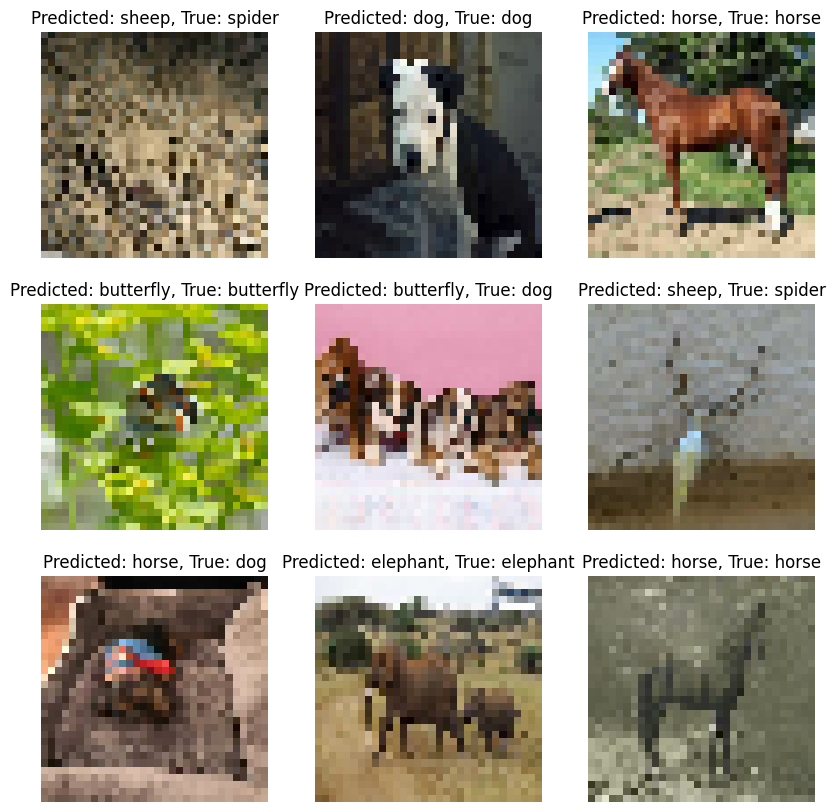

In [9]:
# compare prediction to true labels
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"Predicted: {classes[predicted_labels[i]]}, True: {classes[labels.numpy()[i]]}")
    plt.axis("off")
plt.show()